# ❤️ Heart Disease Prediction using Machine Learning

## 📌 Project Overview
This project predicts whether a person is likely to have heart disease
based on clinical parameters such as age, blood pressure, cholesterol,
and other medical attributes.

## 🎯 Objective
- Analyze patient health data
- Train a classification model
- Predict the presence of heart disease
- Build a deployable ML application

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import shap

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [6]:
!pip install openpyxl

## 📊 Step 1: Data Loading & Dataset Description

The dataset used in this project contains medical records of patients.
Each row represents a patient, and columns represent clinical features
such as age, sex, blood pressure, cholesterol levels, and more.

The target variable indicates whether the patient has heart disease.

In [4]:
df = pd.read_excel("heart.csv.xlsx")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 🔍 Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps in understanding the structure and
distribution of the dataset. In this step, we inspect the dataset,
check summary statistics, and analyze relationships between features
and the target variable.

This step helps identify patterns, trends, and potential issues
such as class imbalance or outliers.

In [5]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Basic info about data types and null values
print("\nDataset info:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

Dataset shape: (1025, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Summary statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


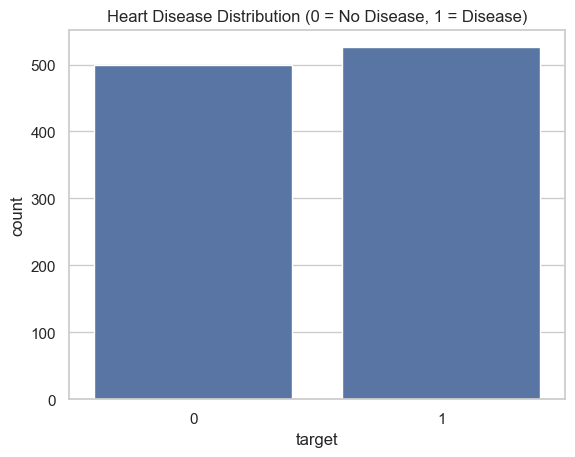

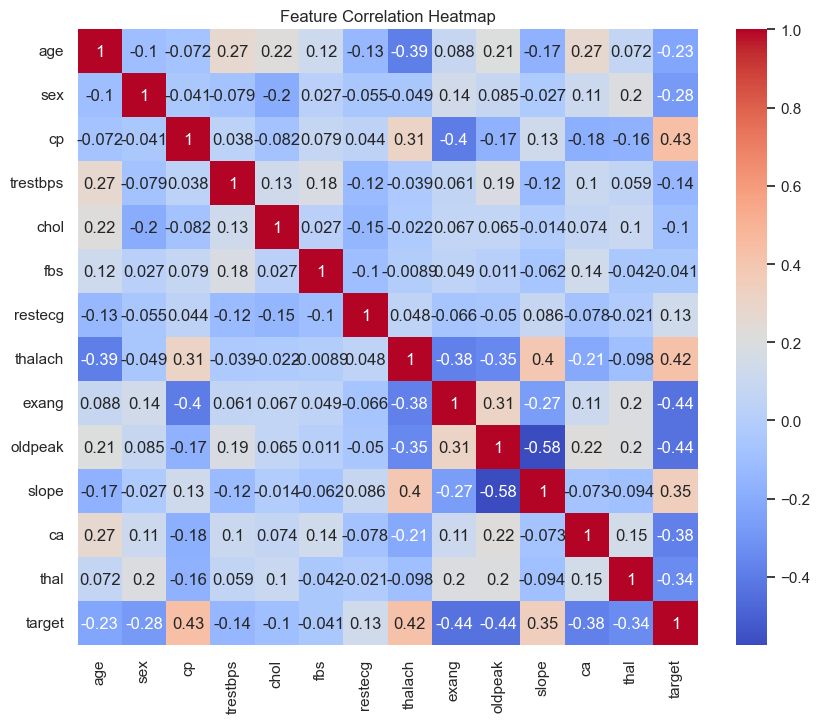

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style
sns.set(style="whitegrid")

# 1️⃣ Count of target values (heart disease vs no disease)
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No Disease, 1 = Disease)")
plt.show()

# 2️⃣ Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## 🧠 Step 3: Model Training, Prediction & Evaluation

In this step, the dataset is split into training and testing sets.
A Logistic Regression model is trained using the training data and
used to make predictions on the test dataset.

The model’s performance is evaluated using accuracy score,
confusion matrix, and classification report to assess how well
it predicts the presence of heart disease.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Split features (X) and target (y)
X = df.drop(columns='target', axis=1)
y = df['target']

# Step 2: Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7951219512195122

Confusion Matrix:
 [[73 29]
 [13 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## 💾 Step 4: Model Saving

The trained machine learning model is saved as a pickle
file so that it can be reused later without retraining.

This file is used for deployment in the Streamlit web app.

In [8]:
import pickle

# Save the trained model as a .pkl file
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model saved successfully as 'heart_model.pkl'")

✅ Model saved successfully as 'heart_model.pkl'


## 🧪 Heart Disease Prediction (User Input Demonstration)

In this section, the trained model is used to predict heart disease
based on user-provided medical inputs.

This step demonstrates how the model can be used in real-world
scenarios by accepting patient details and generating a prediction.

In [9]:
# Example input data (replace values to test different cases)
# Format must match your dataset columns (except 'target')

input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3)

# Convert to numpy array and reshape (since model expects 2D input)
input_data_as_array = np.asarray(input_data).reshape(1, -1)

# Make prediction
prediction = model.predict(pd.DataFrame([input_data], columns=X.columns))

if prediction[0] == 1:
    print("💓 The person is likely to have heart disease.")
else:
    print("🩵 The person is unlikely to have heart disease.")

🩵 The person is unlikely to have heart disease.


In [10]:
import numpy as np
import pandas as pd

# Function to take user input and predict heart disease
def predict_heart_disease():
    print("🫀 Heart Disease Prediction System 🩺")
    print("Please enter the following details:")

    age = int(input("Age: "))
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    cp = int(input("Chest Pain Type (0–3): "))
    trestbps = int(input("Resting Blood Pressure: "))
    chol = int(input("Serum Cholesterol (mg/dl): "))
    fbs = int(input("Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False): "))
    restecg = int(input("Resting ECG Results (0–2): "))
    thalach = int(input("Maximum Heart Rate Achieved: "))
    exang = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
    oldpeak = float(input("ST Depression (Oldpeak): "))
    slope = int(input("Slope of ST Segment (0–2): "))
    ca = int(input("Number of Major Vessels (0–4): "))
    thal = int(input("Thalassemia (0 = Normal, 1 = Fixed Defect, 2 = Reversible Defect, 3 = Other): "))

    # Combine into array
    input_data = (age, sex, cp, trestbps, chol, fbs, restecg,
                  thalach, exang, oldpeak, slope, ca, thal)

    # Convert to DataFrame with same feature names
    input_df = pd.DataFrame([input_data], columns=X.columns)


### 🔁 Example Prediction Using Sample Input

Below is a sample input used to automatically test the trained model
and verify that it produces a valid prediction without manual input.

In [16]:
# Example data for automatic testing (you can change the numbers to test other cases)
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
input_data = [52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]

# Convert input data to dataframe with same feature names
input_df = pd.DataFrame([input_data], columns=X.columns)

# Make prediction
prediction = model.predict(input_df)

# Show result
if prediction[0] == 1:
    print("❤️ The person is likely to have heart disease.")
else:
    print("💙 The person is unlikely to have heart disease.")

💙 The person is unlikely to have heart disease.


## ✅ Conclusion & Key Learnings

- Successfully built a heart disease prediction system
- Logistic Regression achieved good classification accuracy
- Learned end-to-end ML workflow: data → model → evaluation → deployment
- Tools Used: Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Jupyter Notebook
- The model was deployed using Streamlit for real-time prediction